In [19]:
import numpy as np

matrix = np.zeros((11, 11, 11), int)

# 0 - Empty cube
# 1 - Start cube
# 2 - End cube

matrix[0][5][5] = 1
matrix[10][5][5] = 2
print(matrix[0])
print(matrix[10])

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


[[[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 [[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 [[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 ...

 [[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  Tr

{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760dacad90>,
 (0, 0, 10): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760dad3fd0>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db0c400>,
 (0, 1, 10): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db0c7f0>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db0cbe0>,
 (0, 2, 10): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db0cfd0>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db17400>,
 (0, 3, 10): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db177f0>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db17be0>,
 (0, 4, 10): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db17fd0>,
 (0, 5, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db25400>,
 (0, 5, 10): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db257f0>,
 (0, 6, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2760db25be0>,
 (0, 6

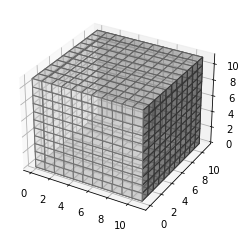

In [27]:
from mpl_toolkits.mplot3d import Axes3D
 
# Create axis
axes = list(matrix.shape)
 
# Create Data
data = np.ones(axes, dtype=bool)
 
# Control Transparency
alpha = 0.7
 
# Control colour
colors = np.empty(axes + [4], dtype=np.float32)
 
for i in range(len(colors)):
    colors[i] = [1, 1, 1, alpha]  # grey
    
# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
# Voxels is used to customizations of
# the sizes, positions and colors.
ax.voxels(data, facecolors=colors, edgecolors='grey')